In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


train = pd.read_pickle('trainCrop.pkl')
print(train.shape)
train_labels = pd.read_csv('../data/train_labels.csv')
test = pd.read_pickle('testCrop.pkl')


(40000, 28, 28)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import time

X = np.array(train)
y = np.array(train_labels['Category'])

n, shape_X, shape_y = X.shape
X_reshaped = X.reshape((n, shape_X*shape_y))

X_train, X_validate, y_train, y_validate = train_test_split(X_reshaped, y, test_size = 0.2)

rfc_results = []
knn_results = []
for k in [10, 100, 1000]:
    rfc = RandomForestClassifier(n_estimators = k)
    start = time.time()
    rfc.fit(X_train, y_train)
    end = time.time()
    acc = accuracy_score(y_validate, rfc.predict(X_validate))
    end_2 = time.time()
    print('num_estimators: {} accuracy: {} time_fit: {}, time_predict: {}'.format(k, acc, end - start, end_2 - end))
    rfc_results.append((k, acc, end - start, end_2 - end))
    
for k in [3, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors = k)
    start = time.time()
    knn.fit(X_train, y_train)
    end = time.time()
    acc = accuracy_score(y_validate, knn.predict(X_validate))
    end_2 = time.time()
    print('num_neighbors: {} accuracy: {} time_fit: {} time_predict: {}'.format(k, acc, end - start, end_2 - end))
    knn_results.append((k, acc, end - start, end_2 - end))
    
results = {
    'RandomForestClassifier': rfc_results,
    'KNearestNeighbours': knn_results
}

print(results)

num_estimators: 10 accuracy: 0.86775 time_fit: 1.3050808906555176, time_predict: 0.0650780200958252
num_estimators: 100 accuracy: 0.903625 time_fit: 12.10417103767395, time_predict: 0.41141581535339355
num_estimators: 1000 accuracy: 0.909625 time_fit: 126.89363098144531, time_predict: 6.097709894180298
num_neighbors: 3 accuracy: 0.87975 time_fit: 7.247467041015625 time_predict: 354.49348497390747
num_neighbors: 5 accuracy: 0.88925 time_fit: 9.65110969543457 time_predict: 321.0266160964966
num_neighbors: 10 accuracy: 0.887 time_fit: 7.678175926208496 time_predict: 335.2476291656494
{'RandomForestClassifier': [(10, 0.86775, 1.3050808906555176, 0.0650780200958252), (100, 0.903625, 12.10417103767395, 0.41141581535339355), (1000, 0.909625, 126.89363098144531, 6.097709894180298)], 'KNearestNeighbours': [(3, 0.87975, 7.247467041015625, 354.49348497390747), (5, 0.88925, 9.65110969543457, 321.0266160964966), (10, 0.887, 7.678175926208496, 335.2476291656494)]}


In [4]:
import csv

X_test = np.array(test)
n_test, shape_X_test, shape_y_test = X_test.shape
X_test_reshaped = X_test.reshape((n_test, shape_X_test*shape_y_test))

y_test_hat = knn.predict(X_test_reshaped)

predictions = pd.DataFrame({'Id': range(len(X_test)), 'Category': y_test_hat})

print(predictions[:10])

predictions.to_csv('predictions.csv')

NameError: name 'knn' is not defined

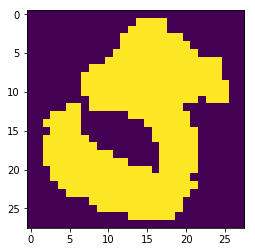

In [42]:
plt.imshow(test[7])
plt.show()

predictions.to_csv('predictions.csv', index=False)

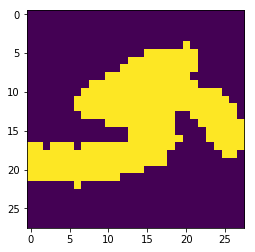

In [3]:
plt.imshow(train[100])
plt.show()